# Tutorial

In [1]:
%load_ext sql

In [2]:
%sql mysql+pymysql:///publications?unix_socket=/var/run/mysql/mysql.sock&read_default_file=~/.my.cnf

In [3]:
%%sql
SELECT *
FROM sales
ORDER BY ord_date;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


stor_id,ord_num,ord_date,qty,payterms,title_id
7067,P2121,1992-06-15 00:00:00,40,Net 30,TC3218
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC7777
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC4203
7896,X999,1993-02-21 00:00:00,35,ON invoice,BU2075
8042,P723,1993-03-11 00:00:00,25,Net 30,BU1111
8042,QA879.1,1993-05-22 00:00:00,30,Net 30,PC1035
7066,A2976,1993-05-24 00:00:00,50,Net 30,PC8888
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS7777
7131,P3087a,1993-05-29 00:00:00,15,Net 60,PS3333
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS2106


In [4]:
%%sql
SELECT
    ord_num,
    sum(qty) AS total_qty
FROM
    sales
GROUP BY
    ord_num;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
16 rows affected.


ord_num,total_qty
423LL922,15
423LL930,10
6871,5
722a,3
A2976,50
D4482,10
N914008,20
N914014,25
P2121,80
P3087a,85


In [5]:
%%sql
SELECT
    *,
    SUM(qty) OVER (PARTITION BY ord_num) AS order_sales
FROM sales
ORDER BY ord_date;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


stor_id,ord_num,ord_date,qty,payterms,title_id,order_sales
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC4203,80
7067,P2121,1992-06-15 00:00:00,40,Net 30,TC3218,80
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC7777,80
7896,X999,1993-02-21 00:00:00,35,ON invoice,BU2075,35
8042,P723,1993-03-11 00:00:00,25,Net 30,BU1111,25
8042,QA879.1,1993-05-22 00:00:00,30,Net 30,PC1035,30
7066,A2976,1993-05-24 00:00:00,50,Net 30,PC8888,50
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS2106,85
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS7777,85
7131,P3087a,1993-05-29 00:00:00,20,Net 60,PS1372,85


In [6]:
%%sql
SELECT
    *,
    SUM(qty) OVER (ORDER BY ord_date) AS cum_sales
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


stor_id,ord_num,ord_date,qty,payterms,title_id,cum_sales
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC4203,80
7067,P2121,1992-06-15 00:00:00,40,Net 30,TC3218,80
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC7777,80
7896,X999,1993-02-21 00:00:00,35,ON invoice,BU2075,115
8042,P723,1993-03-11 00:00:00,25,Net 30,BU1111,140
8042,QA879.1,1993-05-22 00:00:00,30,Net 30,PC1035,170
7066,A2976,1993-05-24 00:00:00,50,Net 30,PC8888,220
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS2106,305
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS7777,305
7131,P3087a,1993-05-29 00:00:00,20,Net 60,PS1372,305


In [7]:
%%sql
SELECT
    *,
    YEAR(ord_date),
    SUM(qty) OVER (PARTITION BY YEAR(ord_date) ORDER BY ord_date) AS year_sales
FROM
    sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


stor_id,ord_num,ord_date,qty,payterms,title_id,YEAR(ord_date),year_sales
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC4203,1992,80
7067,P2121,1992-06-15 00:00:00,40,Net 30,TC3218,1992,80
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC7777,1992,80
7896,X999,1993-02-21 00:00:00,35,ON invoice,BU2075,1993,35
8042,P723,1993-03-11 00:00:00,25,Net 30,BU1111,1993,60
8042,QA879.1,1993-05-22 00:00:00,30,Net 30,PC1035,1993,90
7066,A2976,1993-05-24 00:00:00,50,Net 30,PC8888,1993,140
7131,P3087a,1993-05-29 00:00:00,15,Net 60,PS3333,1993,225
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS2106,1993,225
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS7777,1993,225


In [8]:
%%sql
SELECT
    ord_num,
    ord_date,
    qty,
    SUM(qty) OVER (PARTITION BY ord_date) AS daily_sales,
    SUM(qty) OVER (ORDER BY ord_date) AS cum_sales,
    SUM(qty) OVER (PARTITION BY YEAR(ord_date) ORDER BY ord_date) AS cum_year_sales
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,qty,daily_sales,cum_sales,cum_year_sales
P2121,1992-06-15 00:00:00,20,80,80,80
P2121,1992-06-15 00:00:00,20,80,80,80
P2121,1992-06-15 00:00:00,40,80,80,80
X999,1993-02-21 00:00:00,35,35,115,35
P723,1993-03-11 00:00:00,25,25,140,60
QA879.1,1993-05-22 00:00:00,30,30,170,90
A2976,1993-05-24 00:00:00,50,50,220,140
P3087a,1993-05-29 00:00:00,15,85,305,225
P3087a,1993-05-29 00:00:00,20,85,305,225
P3087a,1993-05-29 00:00:00,25,85,305,225


In [9]:
%%sql
SELECT
    ord_num,
    title_id,
    qty,
    COUNT(title_id) OVER (PARTITION BY ord_num) AS titles_in_order
FROM sales
ORDER BY ord_date;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,title_id,qty,titles_in_order
P2121,TC4203,20,3
P2121,TC7777,20,3
P2121,TC3218,40,3
X999,BU2075,35,1
P723,BU1111,25,1
QA879.1,PC1035,30,1
A2976,PC8888,50,1
P3087a,PS3333,15,4
P3087a,PS1372,20,4
P3087a,PS7777,25,4


In [10]:
%%sql
SELECT
    ord_num,
    title_id,
    qty,
    AVG(qty) OVER (PARTITION BY ord_num) AS avg_qty_by_order
FROM sales
ORDER BY ord_date

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,title_id,qty,avg_qty_by_order
P2121,TC4203,20,26.6667
P2121,TC7777,20,26.6667
P2121,TC3218,40,26.6667
X999,BU2075,35,35.0000
P723,BU1111,25,25.0000
QA879.1,PC1035,30,30.0000
A2976,PC8888,50,50.0000
P3087a,PS2106,25,21.2500
P3087a,PS3333,15,21.2500
P3087a,PS1372,20,21.2500


In [11]:
%%sql
SELECT
    ord_num,
    ord_date,
    ROW_NUMBER() OVER (ORDER BY ord_date) AS row_num
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,row_num
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,2
P2121,1992-06-15 00:00:00,3
X999,1993-02-21 00:00:00,4
P723,1993-03-11 00:00:00,5
QA879.1,1993-05-22 00:00:00,6
A2976,1993-05-24 00:00:00,7
P3087a,1993-05-29 00:00:00,8
P3087a,1993-05-29 00:00:00,9
P3087a,1993-05-29 00:00:00,10


In [12]:
%%sql
SELECT
    ord_num,
    ord_date,
    ROW_NUMBER() OVER (PARTITION BY YEAR(ord_date) ORDER BY ord_date) AS row_num_year
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,row_num_year
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,2
P2121,1992-06-15 00:00:00,3
X999,1993-02-21 00:00:00,1
P723,1993-03-11 00:00:00,2
QA879.1,1993-05-22 00:00:00,3
A2976,1993-05-24 00:00:00,4
P3087a,1993-05-29 00:00:00,5
P3087a,1993-05-29 00:00:00,6
P3087a,1993-05-29 00:00:00,7


In [13]:
%%sql
SELECT
    ord_num,
    ord_date,
    RANK() OVER (PARTITION BY YEAR(ord_date) ORDER BY ord_date) AS row_rank_year
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,row_rank_year
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
X999,1993-02-21 00:00:00,1
P723,1993-03-11 00:00:00,2
QA879.1,1993-05-22 00:00:00,3
A2976,1993-05-24 00:00:00,4
P3087a,1993-05-29 00:00:00,5
P3087a,1993-05-29 00:00:00,5
P3087a,1993-05-29 00:00:00,5


In [14]:
%%sql
SELECT
    ord_num,
    ord_date,
    RANK() OVER (PARTITION BY YEAR(ord_date) ORDER BY ord_date, ord_num) AS row_rank_year
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,row_rank_year
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
X999,1993-02-21 00:00:00,1
P723,1993-03-11 00:00:00,2
QA879.1,1993-05-22 00:00:00,3
A2976,1993-05-24 00:00:00,4
P3087a,1993-05-29 00:00:00,5
P3087a,1993-05-29 00:00:00,5
P3087a,1993-05-29 00:00:00,5


In [15]:
%%sql
SELECT
    ord_num,
    ord_date,
    RANK() OVER (ORDER BY ord_date, ord_num) AS row_rank_year
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,row_rank_year
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
X999,1993-02-21 00:00:00,4
P723,1993-03-11 00:00:00,5
QA879.1,1993-05-22 00:00:00,6
A2976,1993-05-24 00:00:00,7
P3087a,1993-05-29 00:00:00,8
P3087a,1993-05-29 00:00:00,8
P3087a,1993-05-29 00:00:00,8


In [16]:
%%sql
SELECT
    ord_num,
    ord_date,
    DENSE_RANK() OVER (ORDER BY ord_date, ord_num) AS row_rank_year
FROM sales;

 * mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
21 rows affected.


ord_num,ord_date,row_rank_year
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
P2121,1992-06-15 00:00:00,1
X999,1993-02-21 00:00:00,2
P723,1993-03-11 00:00:00,3
QA879.1,1993-05-22 00:00:00,4
A2976,1993-05-24 00:00:00,5
P3087a,1993-05-29 00:00:00,6
P3087a,1993-05-29 00:00:00,6
P3087a,1993-05-29 00:00:00,6


In [17]:
%sql -l

{'mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock': <sql.connection.Connection at 0x7fa079f12ed0>}

# Challenges

In [18]:
%sql mysql+pymysql:///magist?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock

With a query that includes window functions, select all orders with their corresponding products in order_items. We want only the orders with a shipping_limit_date before midnight 2016-10-09. Add a column called total_order_price with a sum of the price of all products belonging to the same order. And add another column showing how many products were in each order. The output should look like the example below.

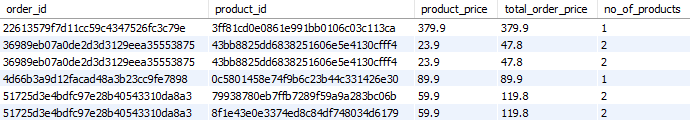

In [32]:
%%sql
SELECT
  order_id,
  product_id,
  price AS product_price,
  ROUND(SUM(price) OVER (PARTITION BY order_id), 2) AS total_order_price,
  COUNT(1) OVER (PARTITION BY order_id) AS no_of_products
FROM order_items
WHERE shipping_limit_date < '2016-10-09'
LIMIT 10;


 * mysql+pymysql:///magist?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
   mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
10 rows affected.


order_id,product_id,product_price,total_order_price,no_of_products
22613579f7d11cc59c4347526fc3c79e,3ff81cd0e0861e991bb0106c03c113ca,379.9,379.9,1
36989eb07a0de2d3d3129eea35553875,43bb8825dd6838251606e5e4130cfff4,23.9,47.8,2
36989eb07a0de2d3d3129eea35553875,43bb8825dd6838251606e5e4130cfff4,23.9,47.8,2
4d66b3a9d12facad48a3b23cc9fe7898,0c5801458e74f9b6c23b44c331426e30,89.9,89.9,1
63638a6806d67773f3adba8534553fff,85b99d83c60cab5b4d8f927ad35212a1,67.9,67.9,1
7033745709b7cf1bac7d2533663592de,35084deab9603bbb6035bb8638b1df89,93.9,93.9,1
bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,44.99,134.97,3
bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,44.99,134.97,3
bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,44.99,134.97,3
c3d9e402b6a0fbe2a5f7fc5b41117c38,817e1c2d22418c36386406ccacfa53e8,189.0,189.0,1


Now let’s go for a challenge that also involves getting information from other tables. We want to see how much people spent in a particular category on a specific day. Select purchased items from order_items that meet these conditions:

- Their order_purchase_timestamp date is 2016-10-09
- Their order_status is “delivered”
- To which category does this product belong? –> English category name, not Portuguese
- Add a column called avg_category_payment with the average price of the items belonging to the same category.
- Add a column called category_total_sales with the summation of the prices for products belonging to the category
- Order the rows by category_total_sales, so we can see which category has made the largest sales on 2016-10-09

The result should look like this:

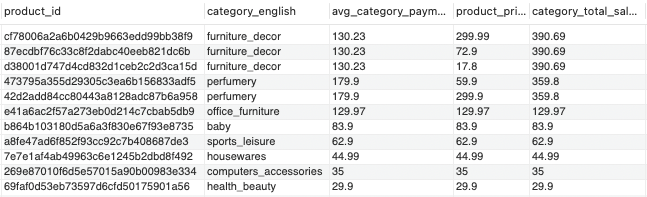


In [50]:
%%sql

SELECT
  product_id,
  product_category_name_english AS category_english,
  ROUND(AVG(price) OVER (PARTITION BY product_category_name), 2) AS avg_category_payment,
  price AS product_price,
  ROUND(SUM(price) OVER (PARTITION BY product_category_name), 2) AS category_total_sales
FROM order_items
JOIN orders USING(order_id)
JOIN products USING(product_id)
JOIN product_category_name_translation USING(product_category_name)
WHERE
  DATE(order_purchase_timestamp) = '2016-10-09'
  AND order_status = 'delivered'
ORDER BY category_total_sales DESC
;

 * mysql+pymysql:///magist?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
   mysql+pymysql:///publications?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
11 rows affected.


product_id,category_english,avg_category_payment,product_price,category_total_sales
87ecdbf76c33c8f2dabc40eeb821dc6b,furniture_decor,130.23,72.9,390.69
cf78006a2a6b0429b9663edd99bb38f9,furniture_decor,130.23,299.99,390.69
d38001d747d4cd832d1ceb2c2d3ca15d,furniture_decor,130.23,17.8,390.69
42d2add84cc80443a8128adc87b6a958,perfumery,179.9,299.9,359.8
473795a355d29305c3ea6b156833adf5,perfumery,179.9,59.9,359.8
e41a6ac2f57a273eb0d214c7cbab5db9,office_furniture,129.97,129.97,129.97
b864b103180d5a6a3f830e67f93e8735,baby,83.9,83.9,83.9
a8fe47ad6f852f93cc92c7b408687de3,sports_leisure,62.9,62.9,62.9
7e7e1af4ab49963c6e1245b2dbd8f492,housewares,44.99,44.99,44.99
269e87010f6d5e57015a90b00983e334,computers_accessories,35.0,35.0,35.0
